### El siguiente Trabajo Práctico consiste en completar el notebook para resolver dos problemas de clasificación con Machine Learning Supervisado

## 1. Clasificación Múltiple con 'N' Features:  Regresión Logística con Scikit-Learn


* En este Notebook vamos a resolver un problema de ***Clasificación Múltiple con las Regresión Logística usando la librería de Scikit-Learn*** para el caso en el que tengamos en nuestro Dataset ***más de dos Features (o atributos)***.

*   DataSet: "iris.csv"

* Para resolver el problema de Clasificación vamos a utilizar la clase **"LogisticRegression()"**, cuya documentación esta en el siguiente enlace:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


* El ejemplo con el que vamos a trabajar, consiste en ***clasificar tres tipos de flores, conociendo los tamaños (alto y ancho) del petalo y sépalo*** de la flor; es decir, que tendremos 4 atributos (o Features).


* Al ser un problema ***de Clasificación múltiple obtenemos tantos modelos como clases tengamos que clasificar***, por lo que para esta caso tendremos que encontrar los parámetros $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4$ para ***tres funciones de decisión*** que sean capaces de discernir una clase con el resto:

<span style="font-size:16px">$$Flor\;1 = \beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;2 = \beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith$$</span>

<span style="font-size:16px">$$Flor\;3 = \beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith$$</span>
    
    
* Aplicando estas funciones de decisión a una logística podremos saber la probabilidad de pertenencia de cada flor a cada una de las clases de la siguiente manera:

<span style="font-size:16px">$$P(Y=Flor\;1|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{1}_0 + \beta^{1}_1 \cdot SepalLenght + \beta^{1}_2 \cdot SepalWith + \beta^{1}_3 \cdot PetalLenght + \beta^{1}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;2|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{2}_0 + \beta^{2}_1 \cdot SepalLenght + \beta^{2}_2 \cdot SepalWith + \beta^{2}_3 \cdot PetalLenght + \beta^{2}_4 \cdot PetalWith)}}$$</span>

<span style="font-size:16px">$$P(Y=Flor\;3|SepalLenght,SepalWith,PetalLenght,PetalWith) = \frac{1}{1 + e^{-(\beta^{3}_0 + \beta^{3}_1 \cdot SepalLenght + \beta^{3}_2 \cdot SepalWith + \beta^{3}_3 \cdot PetalLenght + \beta^{3}_4 \cdot PetalWith)}}$$</span>
    

* ***Daremos como predicción para una nueva flor, aquella clase que mayor probabilidad dé***.


* Para resolver este problema vamos a realizar los siguientes pasos:

    1. [Carga de datos](#M1)

    2. [Cambio de estructura de datos a numpy y transformación de las etiquetas a números](#M2)

    3. [Visualización de los datos](#M3)

    4. [Creacción del modelo (hipótesis) y ajuste](#M4)

    5. [Obtención del modelo (hipótesis)](#M5)

    6. [Cálculo de predicción](#M6)

    7. [Graficar Matriz de confusión](#M7)


* En primer lugar vamos a importar las librería necesarias:



In [5]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline

In [6]:
# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path de la carpeta donde tenemos los datos
folder = "/content/drive/MyDrive/Colab Notebooks/"

### 1. Carga de datos


* El primer paso que vamos a realizar es el de cargar los datos que los tenemos en el siguiente fichero:
    - ***DataSet***: "iris.csv"


* Para ello ***leeremos el csv con pandas*** (pasandolo a un dataframe), teniendo las siguientes columnas:
    - ***class***: Clase de la flor (Iris-versicolor, Iris-setosa)
    - ***sepal_length***: El "largo" del Sepalo
    - ***sepal_width***: El "ancho" del Sepalo
    - ***petal_length***: El "largo" del Pétalo
    - ***petal_width***: El "ancho" del Pétalo
    


In [1]:
# Carga de datos
df = pd.read_csv(folder + "iris.csv")
df.sample(5)

NameError: ignored

### <a name="M2">2. Cambio de estructura de datos a numpy y transformación de las etiquetas a números</a>


* Scikit necesita como entrada para el ajuste (o entrenamiento) del modelo los datos del Dataset de la siguiente forma:
<span></span><br><br>
    - ***Variables de entrada X***: ***Array de Arrays de numpy*** en el que cada array tiene las variables de entrada de un elemento.
<span></span><br><br>
    - ***Variable de salida y*** (solo para aprendizaje supervisado): ***Array de numpy*** en el que cada posición del array contiene la salida o el valor esperado del elemento del Dataset.


* Por tanto, vamos a pasar los datos las flores a una nueva estructura de datos para que scikit-learn puedan trabajar con los datos:
<span></span><br><br>
    - Las ***columnas sepal_length y sepal_width*** representan las variables de entrada y las vamos a pasar a un array de array (***numpy array***).
<span></span><br><br>
    - La ***columna class*** que representa la clase (o variable de salida) y la vamos a pasar a un ***numpy array***.
    
    
* Por otro lado tenemos que transformar la clase de la flor a números, por lo que utilizaremos la clase ***LabelEncoder()*** para transformar las etiquetas de las clases a números, siendo esta transformación:

    - ***0***: ***Iris-Setosa***
    - ***1***: ***Iris-Versicolor***
    - ***2***: ***Iris-Virginica***

In [3]:
# Estructura de datos a numpy

X = df[['sepal_length', 'sepal_width', 
        'petal_length', 'petal_width']].values   # Obtengo el alto y ancho del sepalo
y_labels = df['class'].values                                                # Obtengo las etiquetas

# Transformación de las etiquetas a números
le = preprocessing.LabelEncoder()     # Instancio un objeto de la clase LabelEncoder()
y = le.fit_transform(y_labels)        

NameError: ignored

In [ ]:
# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### <a name="M3">3. Visualización de los datos</a>


* A continuación vamos a ver la relación que hay entre cada par de atributos de los tres tipos de flores.

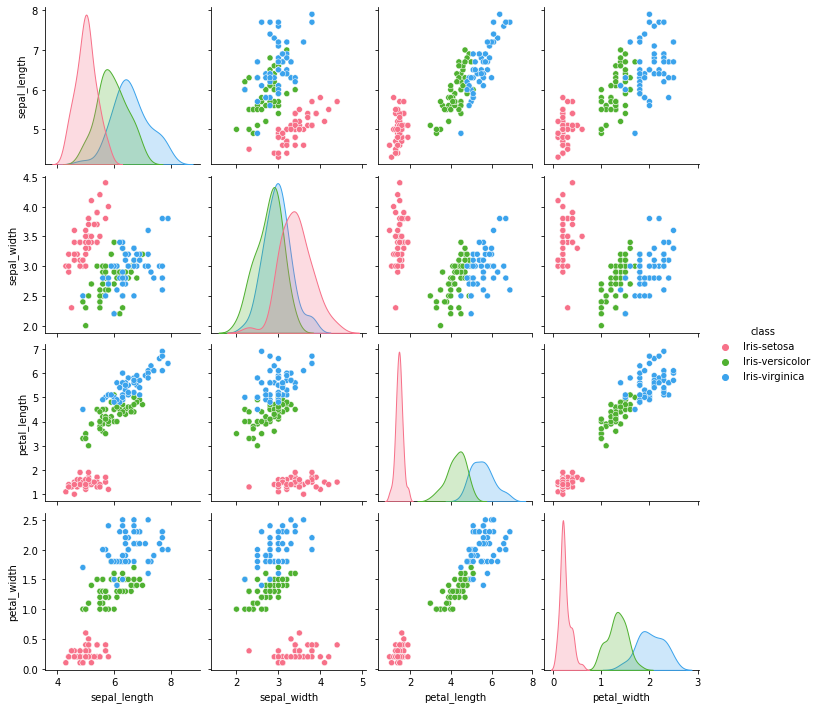

In [ ]:
# usar de seaborn la función pairplot
sns.pairplot(df, hue='class', palette='husl')

### <a name="M4">4. Creacción del modelo (hipótesis) y ajuste</a>


* A continuación pasamos a crear un objeto de la clase "***LogisticRegression()***" para la resolución del problema de clasificación.


* Una vez instanciado, procedemos a ajustar (entrenar) el modelo (o hipótesis) llamando al método ***fit(X,y)*** que recibe como parámetros el conjunto de datos de las variables de entrada 'X' y la variable de salida 'Y'.

In [ ]:
# Creamos un objeto de la clase LogisticRegression pasandole una serie de parámetros
logreg = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo siendo la 'X' el tamaño del sepalo e 'y' el tipo de flor
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

### <a name="M5">5. Obtención del modelo (hipótesis)</a>


* El objeto de la clase ***LogisticRegression*** nos proporciona los resultados de los parámetros $\beta_n$ por medio de los atributos de la clase:
<span></span><br><br>
    - ***coef_***: Nos devuelve en una matriz los parámetros del $\beta_1$ al $\beta_n$ para cada una de las funciones de decisión.
<span></span><br><br>
    - ***intercept_***: Nos devuelve una lista con los parámetros ***$\beta_0$*** para cada una de las funciones de decisión.
    

* Obteniendo estos valores podemos obtener el modelo generado:

In [ ]:
# Obtención del modelo

b0 = logreg.intercept_[0]
b1 = logreg.coef_[0,0]
b2 = logreg.coef_[0,1]


# Mostrarlo (print)

print(f'Z = {b0:0.2f} + {b1:0.2f} · sepal_length + {b2:0.2f} · sepal_width') 

Z = 0.25 + 0.39 · sepal_length + 1.38 · sepal_width


### <a name="M6">6. Cálculo de Predicción</a>


* A continuación vamos a ver como predecir la clase de una Flor usando la librería de Scikit con el método ".predict(flor)" y como obtener esa misma predicción aplicando del modelo obtenido.


* Para ello seleccionemos una flor del Dataset, que para este ejemplo vamos a seleccionar la flor:
    - Class: Iris-Setosa
    - Sepal_lenght: 4.9
    - Sepal_With: 3.0
    - Petal_lenght: 1.4
    - Petal_With: 0.2


In [ ]:
# Valores de X y Y (X[n], Y[n])
X_flor = X_train[1]
y_flor = y_train[1]



print('Flor: X={} - y={} - Clase = {}'.format(X_flor, y_flor, le.inverse_transform([y_flor])))

#aca me confundio el enunciado porque cada ves que se entrena, el X_train[1] y y_train[1] no siempre son las mismas flores


Flor: X=[4.9 2.4 3.3 1. ] - y=1 - Clase = ['Iris-versicolor']


* A continuación vamos a ver cual es la predicción que nos devuelve Scikit-Learn.


* Vamos también cuales son los parámetros de la función de decisión y cual es el resultado de esa función de decisión para cada clase:

In [ ]:
# Predicción y función de decisión
prediccion = logreg.predict([X_flor])
probabilidades = logreg.decision_function([X_flor])


print('Predicción -> Pertenece a la clase {}'.format(prediccion))
print('Predicción Etiquetada -> Pertenece a la clase {}'.format(le.inverse_transform(prediccion)))
print('Resultado de la función de decisión: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))


Predicción -> Pertenece a la clase [1]
Predicción Etiquetada -> Pertenece a la clase ['Iris-versicolor']
Resultado de la función de decisión: 
	Iris-Setosa: -2.64
	Iris-Versicolor: -0.20
	Iris-Virginica: -2.32


* A continuación vamos a calcular la función de decisión de esa flor para cada clase usando el modelo y posteriormente la probabilidad de pertenencia a cada clase:

In [ ]:
# Obtenemos los parámetros
b0 = logreg.intercept_
b = logreg.coef_


# Función de decisión
probabilidades = logreg.decision_function([X_flor])


# Imprimimos las funciones de decisión
print('Función de decisión: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(probabilidades[0,0], probabilidades[0,1], probabilidades[0,2]))


print("")

# Calculamos las probabilidades
prob_setosa = 1 / (1 + math.exp(-1 * (b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1]))))
prob_versicolor = 1 / (1 + math.exp(-1 * (b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1]))))
prob_virginica = 1 / (1 + math.exp(-1 * (b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1]))))

# Imprimimos las probabilidades
print('Probabilidad de pertenencia a cada clase: ' + \
      '\n\tIris-Setosa: {:0.2f}\n\tIris-Versicolor: {:0.2f}\n\tIris-Virginica: {:0.2f}' \
     .format(prob_setosa, prob_versicolor, prob_virginica))





Función de decisión: 
	Iris-Setosa: -2.64
	Iris-Versicolor: -0.20
	Iris-Virginica: -2.32

Probabilidad de pertenencia a cada clase: 
	Iris-Setosa: 1.00
	Iris-Versicolor: 0.36
	Iris-Virginica: 0.00


* Veamos como realizamos esos cálculos con detalle:

In [ ]:
# Imprimimos por pantalla la información de cada cálculo

z_setosa = b0[0] + (b[0,0] * X_flor[0]) + (b[0,1] * X_flor[1])
z_versicolor = b0[1] + (b[1,0] * X_flor[0]) + (b[1,1] * X_flor[1])
z_virginica = b0[2] + (b[2,0] * X_flor[0]) + (b[2,1] * X_flor[1])

prob_setosa = 1 / (1 + math.exp(-1 * (z_setosa)))
prob_versicolor = 1 / (1 + math.exp(-1 * (z_versicolor)))
prob_virginica = 1 / (1 + math.exp(-1 * (z_virginica)))


# Imprimimos por pantalla la información de cada cálculo
print('\nIris-Setosa ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[0], b[0,0], X_flor[0], b[0,1], X_flor[1], z_setosa))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_setosa, 1 / (1 + math.exp(-1 * z_setosa))))


print('\nIris-Versicolor ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[1], b[1,0], X_flor[0], b[1,1], X_flor[1], z_versicolor))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_versicolor, 1 / (1 + math.exp(-1 * z_versicolor))))


print('\nIris-Virginica ')
print('  Z =  {:0.2f} + {:0.2f}·{:0.2f} + {:0.2f}·{:0.2f} = {:0.2f}'.
      format(b0[2], b[2,0], X_flor[0], b[2,1], X_flor[0], z_virginica))
print('  g(Z) =  1 / 1 + e^-({:0.2f}) = {:0.2f}'.format(z_virginica, 1 / (1 + math.exp(-1 * z_virginica))))



Iris-Setosa 
  Z =  0.25 + 0.39·4.90 + 1.38·2.40 = 5.47
  g(Z) =  1 / 1 + e^-(5.47) = 1.00

Iris-Versicolor 
  Z =  0.91 + 0.42·4.90 + -1.49·2.40 = -0.59
  g(Z) =  1 / 1 + e^-(-0.59) = 0.36

Iris-Virginica 
  Z =  -1.08 + -1.52·4.90 + -1.53·4.90 = -12.21
  g(Z) =  1 / 1 + e^-(-12.21) = 0.00


### <a name="M7">7. Matriz de confusión</a>


* Finalmente, calculamos y graficamos la matriz de confusión

In [ ]:
# Métricas con y_test y y_predict

y_predict = logreg.predict(X_test)





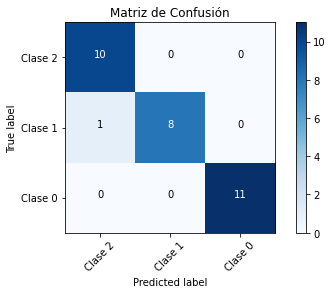

In [ ]:
# Matriz de confusión


def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[2, 1 , 0])
plot_confusion_matrix(matriz_confusion, classes=['Clase 2', 'Clase 1','Clase 0'], title='Matriz de Confusión')
plt.show()

## 2. Clasificación de pacientes con enfermedades coronarias

* El objetivo de este ejercicio es el de obtener un modelo capaz de predecir si un paciente tiene o no una enfermedad coronaria.

*   **DataSet**: "heart_disease.csv"

* Sobre el Dataset se tienen las siguientes características:

    - age: Edad en años
    - sex: (1 = hombre; 0 = mujer)
    - cp: Tipo de dolor en el pecho
    - trestbps: Presión arterial
    - chol: Colesterol
    - fbs: (azúcar en sangre en ayunas> 120 mg / dl) (1 = verdadero; 0 = falso)
    - restecg: Resultados electrocardiográficos en reposo
    - thalach: Frecuencia cardíaca máxima alcanzada
    - exang: Angina inducida por ejercicio (1 = sí; 0 = no)
    - oldpeak: Depresión del ST inducida por el ejercicio relativo al descanso
    - slope: Pendiente del segmento pico del ejercicio ST
    - ca: Número de vasos principales (0-3) coloreados por flourosopía
    - thal: 3 = normal; 6 = defecto fijo; 7 = defecto reversible
    - target: 1 = Enfermo, 0 = Sano


* En este ejercicio se le pide que genere un modelo que sea capaz de **clasificar** a un paciente indicando si sufre o no una enfermendad coronaria.

* Para ello hay que tomar las variables de entrada que se consideren y como variable de salida el target.

* Para resolver este problema vamos a realizar los siguientes pasos:

    1. Carga de datos 
    2. ***Visualización de los datos***, de esta manera podremos seleccionar las variables que consideremos más relevantes visualmente.
    3. ***Cambio de estructura de datos a numpy y transformación de las etiquetas***.
    4. ***Creacción del modelo (hipótesis) y ajuste***.
    5. ***Obtención del modelo (hipótesis)***.
    6. ***Acierto del Modelo***. Obtener el porcentaje de acierto del modelo.
    7. Matriz de confusión

##Carga de los datos

In [7]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline


# Para leer datos de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Path de la carpeta donde tenemos los datos
folder = "/content/drive/MyDrive/Colab Notebooks/"
# Carga de datos
df2 = pd.read_csv(folder + "heart_disease.csv")
df2.sample(5)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
264,54,1,0,110,206,0,0,108,1,0.0,1,1,2,0
138,57,1,0,110,201,0,1,126,1,1.5,1,0,1,1
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0


##Visualizacion

In [ ]:
#sns.pairplot(df2, hue='target', palette='husl') #GRAFICO DE TODAS LAS COLUMNAS
#al usar parplot de todo el data set, se tarda mas o menos 1 minuto pero pude interpretar las columnas
#en las que hay mas distribucion de elementos, y decidi quedarme con (age,trestbps,chol,thalach,oldpeak)


In [ ]:
a=df2.copy()
a = a.drop(columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) 
#sns.pairplot(a, hue='target', palette='husl')   #GRAFICO DE SOLO LAS COLUMNAS QUE ELEGI

#aca compruebo que los datos que elegi son los que mejor se distribuyen, pero nose realmente si el criterio de eleccion es correcto 
#y cuando hago el entrenamiento con todos los datos, el accuracy score me dan un poquito mejor asique opte por quedarme
#con todas las columnas

# Comente los dos graficos para no ejecutarlos

##Cambio de estructura de datos a numpy y transformación de las etiquetas.

In [ ]:
# Estructura de datos a numpy

X = df2[['age', 'trestbps', 
        'chol', 'thalach','oldpeak','sex','cp','fbs','restecg','exang','slope','ca','thal']].values   # Obtengo el alto y ancho del sepalo
y = df2['target'].values                # Obtengo las etiquetas



#las etiquetas ya son numeros por eso no las transforme

# dividir los datos en datos de entrenamiendo y test (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


##Creacción del modelo (hipótesis) y ajuste.

In [ ]:
# Creamos un objeto de la clase LogisticRegression 
logreg2 = LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=50)

# Entrenamos el modelo 
logreg2.fit(X_train, y_train)



LogisticRegression(max_iter=50, multi_class='ovr', solver='liblinear')

##Obtención del modelo (hipótesis).

In [ ]:
B0 = logreg2.intercept_[0]
B1 = logreg2.coef_[0,0]
B2 = logreg2.coef_[0,1]
B3 = logreg2.coef_[0,2]
B4 = logreg2.coef_[0,3]
B5 = logreg2.coef_[0,4]
B6 = logreg2.coef_[0,5]
B7 = logreg2.coef_[0,6]
B8 = logreg2.coef_[0,7]
B9 = logreg2.coef_[0,8]
B10 = logreg2.coef_[0,9]
B11 = logreg2.coef_[0,10]
B12 = logreg2.coef_[0,11]
B13 = logreg2.coef_[0,12]
'sex','cp','fbs','restecg','exang','slope','ca','thal'

print(f'Z = {B0:0.2f} + {B1:0.2f} · age + {B2:0.2f} · Presión arterial + {B3:0.2f} · Colesterol + {B4:0.2f} · Frecuencia cardíaca máx + {B5:0.2f} ·  Depresión del ST')
print(f'+ {B6:0.2f} · Sexo + {B7:0.2f} · Tipo dolor pecho + {B8:0.2f} · Azúcar en sangre en ayunas + {B9:0.2f} · Resultados electrocardiográficos + {B10:0.2f} · Angina inducida')
print(f'+ {B11:0.2f} · Pendiente del segmento pico del ejercicio ST + {B12:0.2f} · Número de vasos principales + {B13:0.2f} · Thal')


Z = 0.29 + 0.02 · age + -0.02 · Presión arterial + -0.01 · Colesterol + 0.03 · Frecuencia cardíaca máx + -0.29 ·  Depresión del ST
+ -1.17 · Sexo + 0.81 · Tipo dolor pecho + -0.16 · Azúcar en sangre en ayunas + 0.36 · Resultados electrocardiográficos + -0.93 · Angina inducida
+ 0.58 · Pendiente del segmento pico del ejercicio ST + -0.77 · Número de vasos principales + -0.90 · Thal


##Acierto del Modelo.

In [ ]:
from sklearn.metrics import accuracy_score


y_predict = logreg2.predict(X_test)
print(accuracy_score(y_true=y_test, y_pred=y_predict))

0.819672131147541


##Matriz de confusión.

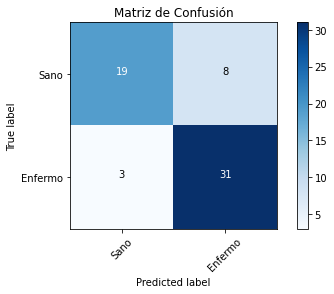

In [ ]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
matriz_confusion = confusion_matrix(y_true=y_test, y_pred=y_predict, labels=[0, 1])
plot_confusion_matrix(matriz_confusion, classes=['Sano', 'Enfermo'], title='Matriz de Confusión')
plt.show()